**Важно. К сожалению, у меня не срослось с облачными вычислительными ресурсами, поэтому считал всё на своём комплюктере, на котором не так много ядер и оперативной памяти, к тому же, судя по всему, gpu не задействуется. Одна эпоха нейронной сети на основе keras, как можно будет увидеть, проходит несколько минут, что в раз так 20, а то и больше, дольше, чем у тех, у кого я спрашивал о скорости обучения. Поэтому прошу прощения за неисправленные заголовки графиков, кучу выводов verbose для алгоритмов перед графиками, малое количество экспериментов и несделанные посление задания. :(**

# Лабораторная работа 3. Нейронные сети

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

Обратите внимание, что мы не ставим оценку за просто написанный код, корректная работоспособность которого не подтверждена экспериментами. Работы, в которых удалены формулировки заданий, проверять сложнее, поэтому за решения без формулировок заданий мы будем снижать баллы в два раза.

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_03.ipynb.

## Алгоритм обратного распространения ошибки

Реализуйте небольшую библиотеку для обучения полносвязных нейронных сетей в рамках задачи классификации.

<img src="http://www.asimovinstitute.org/wp-content/uploads/2016/09/cnn.png" width=500></img>

Библиотека должна поддерживать описанный ниже набор базовых слоев и функций потерь. Обучение сети должно происходить методом стохастического градиентного спуска с подсчетом градиентов с помощью обратного распространения ошибки. На вход каждому слою передается вектор $x\in\mathbb{R}^n$.

### Поддерживаемые слои

 - Полносвязный (*Dense*) слой с заданием количества выходных нейронов $k$:
 
 $$\mathrm{Dense} \equiv \textbf{W}\textbf{x}+\textbf{b},$$
 
 где $\textbf{W}\in\mathbb{R}^{(k,n)}$ — матрица весов слоя, $\textbf{b}\in\mathbb{R}^k$ — вектор смещений (bias) слоя.
 
 
 - Слой логистической нелинейности (*Sigmoid*), который применяется поэлементно ко всем входам:
 
  $$\mathrm{Sigmoid} \equiv \frac{1}{1+e^{-\textbf{x}}}$$
  
 - Обобщение логистической функции для многомерного случая (*Softmax*). Позволяет моделировать распределение вероятностей над дискретным набором классов:
  
  $$\mathrm{Softmax} \equiv \frac{e^{-\textbf{x}_i}}{\sum\limits_{j = 1\dots k} e^{-\textbf{x}_j}}$$
  
 - [Dropout](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) слой с заданием вероятности выключения нейрона ($d$). Dropout слой ведет себя по разному в фазай обучения и применения. 
  
  В фазе обучения независимо для каждого обучающего примера сэмплируется случайная бинарная маска $\textbf{m}$, которая будет определять какие нейроны окажутся выключенными:
  
    $$\mathrm{Dropout_{train}} \equiv \textbf{m}\odot\textbf{x}$$
    $$\textbf{m} \in \left\{0,1\right\}^{n}$$
    $$p\left(m_{i}=0\right)=d$$
   
  В фазе применения входные значения масштабируются, чтобы сохранить уровень активности, поступающий на следующий слой:
  
      $$\mathrm{Dropout_{test}}\equiv \left(1-d\right)\textbf{x}$$
      
#### Требования к реализации

Каждый из слоев должен быть написан в виде отдельного класса, с методами *fprop* (прямой просчет выходов сети) и *bprop* (обратный прогон сети с нахождением градиентов весовых коэффициентов):

    class Layer:
        def fprop(self, inputs, pass_type='train'):
            pass
            
        def bprop(self, outputs_deriv)
            pass
            
- В метод <i>bprop</i> должен передаваться градиент по выходам данного слоя. Для слоя softmax на вход (в переменной inputs) должны подаваться не только выходы предыдщего слоя, но и метки классов.

- При создании Dense слоя весовые коэффициенты должны инициализироваться из распределения $U(-0.01,0.01)$.

In [1]:
import numpy as np

In [38]:
class DenseLayer:
    def __init__(self, k, n):
        self.weights = np.random.uniform(-0.01, 0.01, (k, n))
        self.up_weights = self.weights.copy()
        self.bias = np.random.uniform(-0.01, 0.01, (k,))
    
    def fprop(self, inputs, pass_type='train'):
        return self.weights.dot(inputs) + self.bias
    
    def bprop(self, outputs_deriv, fprop_inputs, learning_rate):
        self.up_weights -= learning_rate * np.dot(outputs_deriv.reshape(outputs_deriv.shape[0], 1), 
                                               fprop_inputs.reshape((1, fprop_inputs.shape[0])))
        return outputs_deriv.dot(self.weights)
    
    def new_mask(self):
        pass
    
    def new_weights(self):
        self.weights = self.up_weights.copy()


class SigmoidLayer:
    def fprop(self, inputs, pass_type='train'):
        return 1 / (1 + np.exp(-inputs))
    
    def bprop(self, outputs_deriv, fprop_inputs, learning_rate):
        exxp = np.exp(fprop_inputs)
        return outputs_deriv * exxp / ((1 + exxp) ** 2)
    
    def new_mask(self):
        pass

    def new_weights(self):
        pass
    
    
class SoftmaxLayer:
    def fprop(self, inputs, pass_type='train'):
        exxp = np.exp(-inputs)
        return exxp / np.sum(exxp)
    
    def bprop(self, outputs_deriv, fprop_inputs, learning_rate):
        exxp = np.exp(-fprop_inputs)
        exp_sum = np.sum(exxp)
        return -outputs_deriv * exxp * (exp_sum - exxp) / (exp_sum ** 2)
    
    def new_mask(self):
        pass
    
    def new_weights(self):
        pass
    
    
class DropoutLayer:
    def __init__(self, n, d):
        self.d = d
        self.mask = np.random.uniform(0, 1, n)
        
    def fprop(self, inputs, pass_type='train'):
        if (pass_type == 'train'):
            m = (self.mask > self.d).astype(float)
            return m * inputs
        else:
            return (1 - self.d) * inputs
        
    def bprop(self, outputs_deriv, fprop_inputs, learning_rate):
        return outputs_deriv  * (self.mask > self.d).astype(float) * fprop_inputs
    
    def new_mask(self):
        n = self.mask.shape
        self.mask = np.random.uniform(0, 1, n)
        
    def new_weights(self):
        pass

In [91]:
def mse(labels, logits):
    return np.mean((logits - labels) ** 2, axis=1)

def cross_entropy(labels, logits):
    return -(np.mean(labels * np.log(logits) + (1 - labels) * np.log(1 - logits)))

def mse_deriv(labels, logits):
    return 2 * (logits - labels) / logits.shape[0]

def cross_entropy_deriv(labels, logits):
    return (logits - labels) / logits / (1 - logits) / logits.shape[0]

### Поддерживаемые функции потерь

 - Средний квадрат ошибки (*MSE*):
 
      $$\mathrm{L(y, \hat{y})} = \frac{1}{N} \sum\limits_{i=1}^N (\hat{y}_i - y_i)^2$$

 - Обобщение логистической регрессии на случай множества классов (*Cross-entropy*): 
     
     $$\mathrm{L(y, \hat{y})} = - \frac{1}{N} \sum\limits_{i=1}^N (y_i \log \hat{y}_i + (1-y_i) \log (1-\hat{y}_i))$$

### Общие требования к реализации библиотеки

Необходимо реализовать класс нейронной сети, который должен позволять конструировать сети из любой последовательности вышеназванных классов и обучаться на входной выборке. Класс нейронной сети должен хранить в себе упорядоченный список слоев.

    class NeuralNet:
        def add(self, layer):
            pass
    
        def fit(self, X_train, y_train, batch_size, lr, num_epochs):
            pass
            
        def predict(self, X):
            pass
            
 - Обучение должно происходить методом стохастического градиентного спуска с задаваемыми параметрами размера батча $K$ и шага обучения $\eta$:
$$\textbf{W} \leftarrow \textbf{W}-\eta \sum_{k=1}^{K}{\nabla_{\textbf{W}}L\left(\textbf{x}^k\right)}$$ 
(под батчем понимается группа примеров, которая обрабатывается одновременно без обновления весов; последний батч в эпохе может быть неполным)
 - В процессе обучения должен осуществляться подсчет как значения функции потерь, так и ошибки классификации. Эти ошибки должны выводиться один раз в эпоху. 
 - Методы *predict* и *fit* должны принимать на вход numpy матрицу, в строках которой содержатся обучающие примеры.
 - Все вычисления в описанных методах должны быть реализованы в матричной форме.

**Обратите внимание**, что в процессе написания библиотеки вам понадобится добавлять различные вспомогательные функции в исходный шаблон.

In [ ]:
import datetime

In [85]:
class NeuralNet:
    def __init__(self, loss_function, loss_deriv):
        self.layers = []
        self.loss_function = loss_function
        self.loss_deriv = loss_deriv
    
    def add(self, layer):
        self.layers.append(layer)
    
    def fit(self, X_train, y_train, batch_size, lr, num_epochs, verbose = True):
        for i in range(num_epochs):
            if (verbose):
                print('epoch {}'.format(i+1))
            for layer in self.layers:
                layer.new_mask()
            ind = np.arange(X_train.shape[0])
            np.random.shuffle(ind)
            cur_time = datetime.datetime.now()
            for left in range(0, X_train.shape[0], batch_size):
                right = min(X_train.shape[0], left + batch_size)
                X_batch = X_train[ind[left:right]]
                y_batch = y_train[ind[left:right]]
                for x, y in zip(X_batch, y_batch):
                    inputs = []
                    inputs.append(x)
                    for layer in self.layers:
                        inputs.append(layer.fprop(inputs[-1]))
                    derivs = [] 
                    derivs.append(self.loss_deriv(y, inputs[-1]))
                    for i in range(len(self.layers)-1, -1, -1):
                        derivs.append(self.layers[i].bprop(derivs[-1], inputs[i], lr))
                for layer in self.layers:
                    layer.new_weights()
                if verbose and left % 21 == 0 and left != 0:
                    print('time of ' + str(left // batch_size)+ ' batches evaluated: {}'.format(datetime.datetime.now() - cur_time))
            prediction = self.predict(X_train)
            loss = 0
            true_count = 0
            pred_labels = np.argmax(prediction, axis=1)
            y_labels = np.argmax(y_train, axis=1)
            for i in range(X_train.shape[0]):
                loss += self.loss_function(y_train[i], prediction[i])
            loss /= X_train.shape[0]
            if verbose:
                print('loss = {}'.format(loss) + \
                      ',  accuracy = {}'.format(np.sum(pred_labels == y_labels) / pred_labels.shape[0]))
        

    def predict(self, X, pass_type = 'test'):
        pred = []
        for i in range(X.shape[0]):
            result = X[i].copy()
            for layer in self.layers:
                result = layer.fprop(result, pass_type)
            pred.append(result)
        return np.array(pred)

**(4 балла) Задание 1.** С помощью разработанных вами классов решите задачу классификации изображений [fashionMNIST](https://github.com/zalandoresearch/fashion-mnist). Ваша реализация должна работать эквивалентно по качеству [решению на основе keras](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/82656r55dx4pcoc/fMNIST_example.ipynb?dl=0) при той же самой архитектуре сети и параметрах обучения.

<img src="https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true" width=500></img>

**Подготовка данных:**

In [29]:
%pylab inline
from matplotlib import pyplot as plt
import numpy as np
import os
from copy import copy
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [30]:
def load_fmnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load fMNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

In [31]:
x_train, y_train = load_fmnist('data/fashion', kind='train')
x_test, y_test = load_fmnist('data/fashion', kind='t10k')

In [32]:
from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import SGD  
from keras import backend as K

import keras.utils
from keras import regularizers

from keras.preprocessing.image import ImageDataGenerator

In [33]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 784)
60000 train samples
10000 test samples


**Запуск своей нейронной сети. Смог посчтитать только 10 эпох, но тут проблема больше в компьютере, чем в сети, да и в сети тоже, если учесть, что на tensorflow всё считается в разы быстрее. Но, как далее можно убедиться, мой компьютер и для них очень долго обучает сети, поэтому не стоит ругать мой сеть за её низкую скорость, да и в самом заданни сказано обрабатывать вектор в реализации, а не матрицу обучающей выборки, что могло бы значительно (но это не точно) ускорить работу сети. Но она учится и метрика качества (accuracy), и функция потерь (кросс-энтропия) улучшаются с каждой эпохой, что греет во мне надежду, что с распространением ошибки я справился. :)**

In [73]:
model = NeuralNet(cross_entropy, cross_entropy_deriv)

model.add(DenseLayer(512, len(x_train[0])))
model.add(SigmoidLayer())
model.add(DropoutLayer(512, 0.3))
model.add(DenseLayer(512, 512))
model.add(SigmoidLayer())
model.add(DropoutLayer(512, 0.3))
model.add(DenseLayer(10, 512))
model.add(SoftmaxLayer())
model.fit(x_train, y_train, 128, 0.1, 10)

epoch 1
time of 21 batches evaluated: 0:01:24.431088
time of 42 batches evaluated: 0:02:52.871578
time of 63 batches evaluated: 0:04:18.359041
time of 84 batches evaluated: 0:05:36.069711
time of 105 batches evaluated: 0:06:43.356505
time of 126 batches evaluated: 0:07:49.990116
time of 147 batches evaluated: 0:08:57.728600
time of 168 batches evaluated: 0:10:11.712324
time of 189 batches evaluated: 0:11:17.887533
time of 210 batches evaluated: 0:12:26.554515
time of 231 batches evaluated: 0:13:49.660505
time of 252 batches evaluated: 0:15:09.880677
time of 273 batches evaluated: 0:16:24.326184
time of 294 batches evaluated: 0:17:37.733160
time of 315 batches evaluated: 0:18:54.288267
time of 336 batches evaluated: 0:20:14.158566
time of 357 batches evaluated: 0:21:34.507402
time of 378 batches evaluated: 0:23:02.291828
time of 399 batches evaluated: 0:24:30.447121
time of 420 batches evaluated: 0:25:50.403919
time of 441 batches evaluated: 0:27:15.074655
time of 462 batches evaluated:

time of 357 batches evaluated: 0:18:13.001075
time of 378 batches evaluated: 0:19:16.454131
time of 399 batches evaluated: 0:20:20.632796
time of 420 batches evaluated: 0:21:23.859976
time of 441 batches evaluated: 0:22:28.033264
time of 462 batches evaluated: 0:23:33.376410
loss = 0.11247645147445963,  accuracy = 0.7372333333333333
epoch 9
time of 21 batches evaluated: 0:01:07.755027
time of 42 batches evaluated: 0:02:12.313174
time of 63 batches evaluated: 0:03:16.280964
time of 84 batches evaluated: 0:04:20.873070
time of 105 batches evaluated: 0:05:24.599618
time of 126 batches evaluated: 0:06:29.583313
time of 147 batches evaluated: 0:07:33.689808
time of 168 batches evaluated: 0:08:38.597882
time of 189 batches evaluated: 0:09:42.743510
time of 210 batches evaluated: 0:10:47.447053
time of 231 batches evaluated: 0:11:51.765262
time of 252 batches evaluated: 0:12:55.940964
time of 273 batches evaluated: 0:14:00.466928
time of 294 batches evaluated: 0:15:04.233012
time of 315 batch

**Посмотрим, как работает построенная модель на тетовых данных, для этого посчитаем среднюю кросс-энтропию, которую считаем также и во время обучения, и значение метрики качества accuracy. Видим, что наша модель не сильно успела переобучиться и что она за 10 эпох дастигла хорошего качества предсказания.**

In [74]:
pred = model.predict(x_test)

In [82]:
pred_labels = np.argmax(pred, axis=1)
y_labels = np.argmax(y_test, axis=1)

In [96]:
loss = 0
for i in range(len(y_test)):
    loss += cross_entropy(y_test[i], pred[i])

In [97]:
print('accuracy on test set: {}'.format(np.sum(pred_labels == y_labels) / pred.shape[0]))
print('loss on test set: {}'.format(loss / pred.shape[0]))

accuracy on test set: 0.7941
loss on test set: 0.09751969209548349


**(2 балла) Задание 2.** Используя возможности библитеки [keras](https://keras.io/), попробуйте достичь качества 88% на тесте, меняя следующие параметры модели:
- learning rate: постоянный (0.1 и 0.01) и переменный (метод [LearningRateScheduler](https://keras.io/callbacks/#learningratescheduler));
- тип активации на скрытом слое;
- количество скрытых слоев (от 1 до 6).

Для каждого эксперимента постройте графики качества и функции потерь. В экспериментах с количеством скрытых слоев сравните как возрастает время обучения при увеличении числа скрытых слоев.

**Запустил несколько экспериментов для различных функций активации (tanh, relu), learning rate попробовал, после переменный запустил для трёх наборов параметров, но лишь 20 эпох взял, чтобы быстрее посчитало, а для сравнения наборов хватиет и динамики изменения значения потери и метрики качества. Снова прошу прощения за вывод verbose перед графиками.**

In [26]:
def test(lrate, n_hidden_layers, k_init='sigmoid'):
    model = Sequential()
    model.add(Dense(512, input_dim=len(x_train[0]), kernel_initializer='uniform'))
    model.add(Activation(k_init))
    model.add(Dropout(0.3))
    for i in range(1, n_hidden_layers):
        model.add(Dense(512, kernel_initializer='uniform'))
        model.add(Activation(k_init))
        model.add(Dropout(0.3))
    model.add(Dense(10, kernel_initializer='uniform'))
    model.add(Activation('softmax'))

    sgd = SGD(lr=lrate, momentum=0.0, decay=0.0)
    model.compile(loss='categorical_crossentropy',
            optimizer=sgd,
            metrics=['accuracy'])

    history = model.fit(x_train, y_train,
            epochs=40,
            batch_size=128,
            verbose=1,
            validation_data=(x_test, y_test))

    score = model.evaluate(x_test, y_test, batch_size=128)
    print(score)
    train_error = 1 - np.array(history.history['acc'])
    val_error = 1 - np.array(history.history['val_acc'])

    plt.figure(figsize=(12, 8))
    plt.plot(train_error, label = 'train')
    plt.plot(val_error, label = 'test')
    plt.title('fMNIST error')
    plt.xlabel('Train epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

**Функция активации relu лучше всех себя показала**

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 136s 2ms/step - loss: 0.9054 - acc: 0.6687 - val_loss: 0.5492 - val_acc: 0.8042
Epoch 2/40
60000/60000 [==============================] - 142s 2ms/step - loss: 0.5130 - acc: 0.8159 - val_loss: 0.4735 - val_acc: 0.8280
Epoch 3/40
60000/60000 [==============================] - 143s 2ms/step - loss: 0.4465 - acc: 0.8375 - val_loss: 0.4313 - val_acc: 0.8415
Epoch 4/40
60000/60000 [==============================] - 149s 2ms/step - loss: 0.4101 - acc: 0.8507 - val_loss: 0.3929 - val_acc: 0.8561
Epoch 5/40
60000/60000 [==============================] - 150s 3ms/step - loss: 0.3872 - acc: 0.8589 - val_loss: 0.4307 - val_acc: 0.8372
Epoch 6/40
60000/60000 [==============================] - 138s 2ms/step - loss: 0.3686 - acc: 0.8662 - val_loss: 0.3838 - val_acc: 0.8605
Epoch 7/40
60000/60000 [==============================] - 145s 2ms/step - loss: 0.3558 - acc: 0.8706 - val_loss: 0.3747 - 

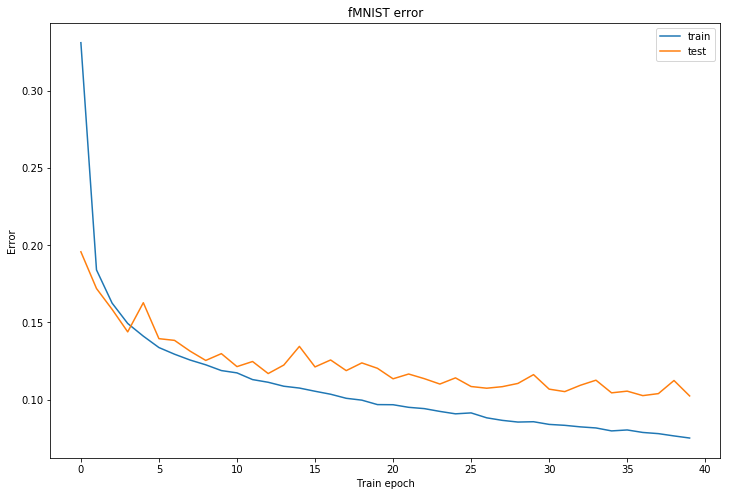

In [28]:
test(0.1, 3, 'relu')

**На большом числе скрытых слоёв сигмоидная активация не впечатлила.**

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 128s 2ms/step - loss: 2.3511 - acc: 0.1010 - val_loss: 2.3539 - val_acc: 0.1000
Epoch 2/40
60000/60000 [==============================] - 122s 2ms/step - loss: 2.3208 - acc: 0.0990 - val_loss: 2.3096 - val_acc: 0.1000
Epoch 3/40
60000/60000 [==============================] - 122s 2ms/step - loss: 2.3130 - acc: 0.0995 - val_loss: 2.3134 - val_acc: 0.1000
Epoch 4/40
60000/60000 [==============================] - 122s 2ms/step - loss: 2.3098 - acc: 0.1008 - val_loss: 2.3084 - val_acc: 0.1000
Epoch 5/40
60000/60000 [==============================] - 122s 2ms/step - loss: 2.3081 - acc: 0.0994 - val_loss: 2.3065 - val_acc: 0.1000
Epoch 6/40
60000/60000 [==============================] - 122s 2ms/step - loss: 2.3062 - acc: 0.1005 - val_loss: 2.3058 - val_acc: 0.1000
Epoch 7/40
60000/60000 [==============================] - 123s 2ms/step - loss: 2.3059 - acc: 0.1008 - val_loss: 2.3040 - 

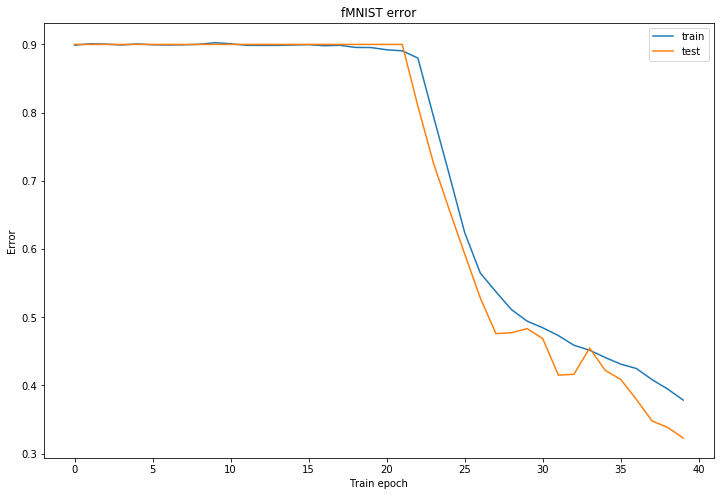

In [38]:
test(0.1, 4)

**Гиперболический тангенс лучше, но до relu недотягивает. Далее будет эксперимент для большего числа скрытых слоёв и переменным learning rate.**

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.6602 - acc: 0.7745 - val_loss: 0.5625 - val_acc: 0.7992
Epoch 2/40
60000/60000 [==============================] - 61s 1ms/step - loss: 0.4945 - acc: 0.8246 - val_loss: 0.4817 - val_acc: 0.8249
Epoch 3/40
60000/60000 [==============================] - 61s 1ms/step - loss: 0.4659 - acc: 0.8347 - val_loss: 0.5308 - val_acc: 0.8164
Epoch 4/40
60000/60000 [==============================] - 61s 1ms/step - loss: 0.4490 - acc: 0.8417 - val_loss: 0.4739 - val_acc: 0.8291
Epoch 5/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.4328 - acc: 0.8465 - val_loss: 0.5270 - val_acc: 0.8193
Epoch 6/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.4278 - acc: 0.8479 - val_loss: 0.4568 - val_acc: 0.8311
Epoch 7/40
60000/60000 [==============================] - 60s 1ms/step - loss: 0.4197 - acc: 0.8508 - val_loss: 0.4459 - val_acc

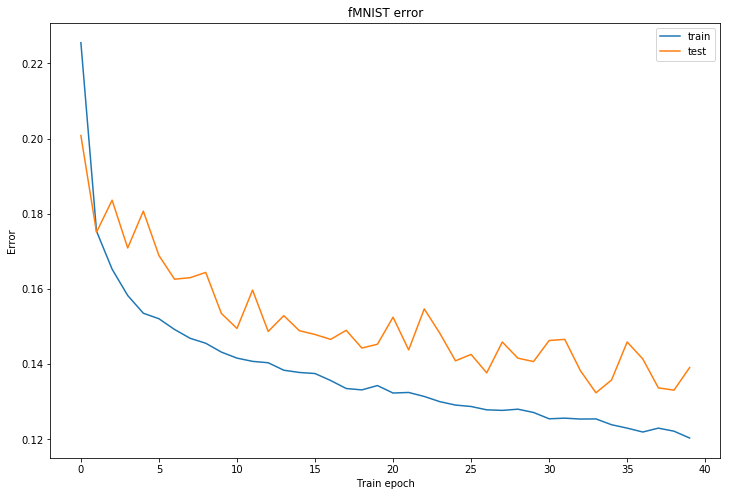

In [33]:
test(0.1, 1, 'tanh')

**Также не очень хорошо работает модель с шагом обучения 0.01**

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 50s 829us/step - loss: 2.0464 - acc: 0.3344 - val_loss: 1.7337 - val_acc: 0.6048
Epoch 2/40
60000/60000 [==============================] - 48s 807us/step - loss: 1.5264 - acc: 0.5585 - val_loss: 1.3025 - val_acc: 0.6770
Epoch 3/40
60000/60000 [==============================] - 49s 809us/step - loss: 1.2204 - acc: 0.6277 - val_loss: 1.0851 - val_acc: 0.7023
Epoch 4/40
60000/60000 [==============================] - 49s 815us/step - loss: 1.0572 - acc: 0.6625 - val_loss: 0.9611 - val_acc: 0.7136
Epoch 5/40
60000/60000 [==============================] - 49s 813us/step - loss: 0.9565 - acc: 0.6839 - val_loss: 0.8788 - val_acc: 0.7249
Epoch 6/40
60000/60000 [==============================] - 49s 816us/step - loss: 0.8905 - acc: 0.6992 - val_loss: 0.8240 - val_acc: 0.7300
Epoch 7/40
60000/60000 [==============================] - 49s 816us/step - loss: 0.8407 - acc: 0.7100 - val_loss: 0.

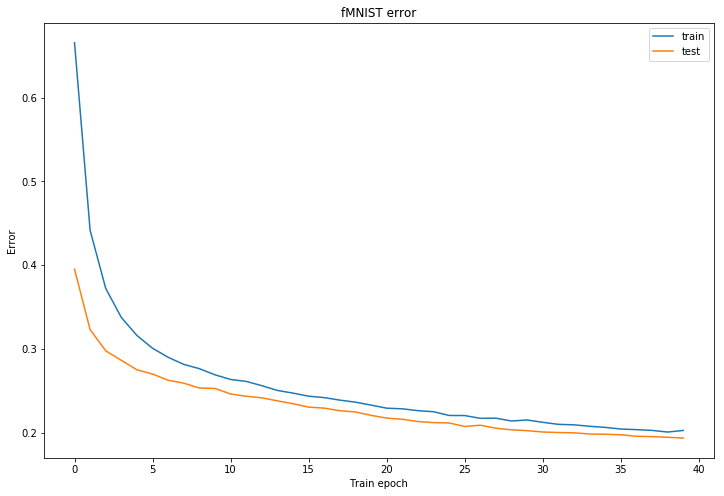

In [34]:
test(0.01, 1, 'sigmoid')

**Далее рассмотрим непостоянный learning rate. Реализацию подсмотрел по ссылке.
https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/**

In [31]:
import math
from keras.callbacks import LearningRateScheduler

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

def test_sched(n_hidden_layers, k_init='sigmoid'):
    model = Sequential()
    model.add(Dense(512, input_dim=len(x_train[0]), kernel_initializer='uniform'))
    model.add(Activation(k_init))
    model.add(Dropout(0.3))
    for i in range(1, n_hidden_layers):
        model.add(Dense(512, kernel_initializer='uniform'))
        model.add(Activation(k_init))
        model.add(Dropout(0.3))
    model.add(Dense(10, kernel_initializer='uniform'))
    model.add(Activation('softmax'))

    #sgds = [SGD(lr=0.1, momentum=0.0, decay=0.0), SGD(lr=0.01, momentum=0.0, decay=0.0)]
    sgd = SGD(lr=0.0, momentum=0.0, decay=0.0)
    model.compile(loss='categorical_crossentropy',
            optimizer=sgd,
            metrics=['accuracy'])
    lrate = LearningRateScheduler(step_decay)
    callbacks_list = [lrate]
    history = model.fit(x_train, y_train,
            epochs=20,
            batch_size=128,
            verbose=1, 
            callbacks=callbacks_list,            
            validation_data=(x_test, y_test))

    score = model.evaluate(x_test, y_test, batch_size=128)
    print(score)
    train_error = 1 - np.array(history.history['acc'])
    val_error = 1 - np.array(history.history['val_acc'])

    plt.figure(figsize=(12, 8))
    plt.plot(train_error, label = 'train')
    plt.plot(val_error, label = 'test')
    plt.title('fMNIST error')
    plt.xlabel('Train epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

**Уже к двадцатой эпохе relu хорош.**

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 98s 2ms/step - loss: 0.8799 - acc: 0.6782 - val_loss: 0.6128 - val_acc: 0.7676
Epoch 2/20
60000/60000 [==============================] - 98s 2ms/step - loss: 0.5155 - acc: 0.8142 - val_loss: 0.4762 - val_acc: 0.8277
Epoch 3/20
60000/60000 [==============================] - 97s 2ms/step - loss: 0.4442 - acc: 0.8388 - val_loss: 0.4717 - val_acc: 0.8273
Epoch 4/20
60000/60000 [==============================] - 97s 2ms/step - loss: 0.4107 - acc: 0.8501 - val_loss: 0.3945 - val_acc: 0.8566
Epoch 5/20
60000/60000 [==============================] - 98s 2ms/step - loss: 0.3848 - acc: 0.8609 - val_loss: 0.4328 - val_acc: 0.8426
Epoch 6/20
60000/60000 [==============================] - 102s 2ms/step - loss: 0.3688 - acc: 0.8651 - val_loss: 0.3841 - val_acc: 0.8637
Epoch 7/20
60000/60000 [==============================] - 98s 2ms/step - loss: 0.3562 - acc: 0.8696 - val_loss: 0.4254 - val_ac

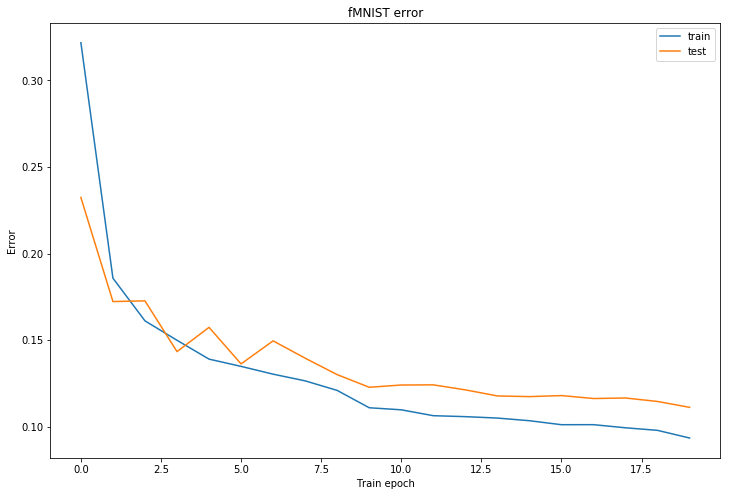

In [35]:
test_sched(3, 'relu')

**Сигмоида не сильно улучшилась.**

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 99s 2ms/step - loss: 2.3467 - acc: 0.1021 - val_loss: 2.3241 - val_acc: 0.1000
Epoch 2/20
60000/60000 [==============================] - 99s 2ms/step - loss: 2.3063 - acc: 0.1134 - val_loss: 2.2643 - val_acc: 0.1000
Epoch 3/20
60000/60000 [==============================] - 99s 2ms/step - loss: 1.9256 - acc: 0.2248 - val_loss: 1.5872 - val_acc: 0.3948
Epoch 4/20
60000/60000 [==============================] - 99s 2ms/step - loss: 1.4004 - acc: 0.4116 - val_loss: 1.1340 - val_acc: 0.5459
Epoch 5/20
60000/60000 [==============================] - 99s 2ms/step - loss: 1.0945 - acc: 0.5589 - val_loss: 0.9675 - val_acc: 0.6224
Epoch 6/20
60000/60000 [==============================] - 99s 2ms/step - loss: 0.9845 - acc: 0.6070 - val_loss: 0.8829 - val_acc: 0.6435
Epoch 7/20
60000/60000 [==============================] - 99s 2ms/step - loss: 0.9311 - acc: 0.6306 - val_loss: 0.8433 - val_acc

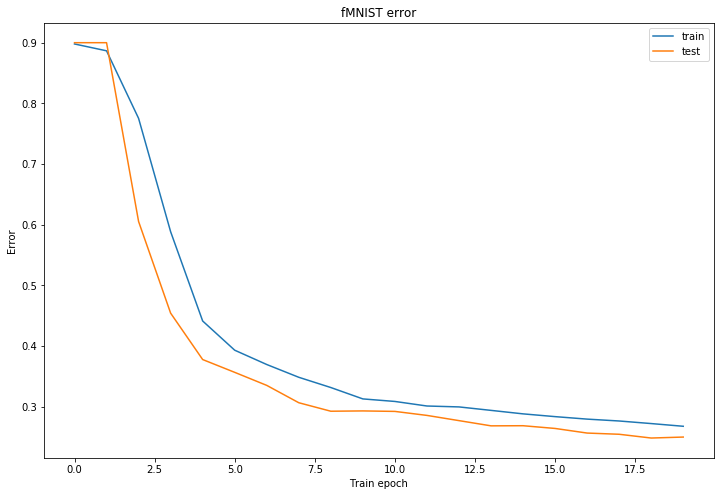

In [36]:
test_sched(3)

**Здесь можно увидеть, что для трёх скрытых слоёв tanh лучше, чем на меньшем числе слоёв.**

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 116s 2ms/step - loss: 0.6939 - acc: 0.7524 - val_loss: 0.6124 - val_acc: 0.7538
Epoch 2/20
60000/60000 [==============================] - 106s 2ms/step - loss: 0.5098 - acc: 0.8162 - val_loss: 0.5339 - val_acc: 0.8065
Epoch 3/20
60000/60000 [==============================] - 99s 2ms/step - loss: 0.4741 - acc: 0.8298 - val_loss: 0.4674 - val_acc: 0.8302
Epoch 4/20
60000/60000 [==============================] - 98s 2ms/step - loss: 0.4538 - acc: 0.8362 - val_loss: 0.4513 - val_acc: 0.8397
Epoch 5/20
60000/60000 [==============================] - 98s 2ms/step - loss: 0.4364 - acc: 0.8436 - val_loss: 0.4590 - val_acc: 0.8296
Epoch 6/20
60000/60000 [==============================] - 98s 2ms/step - loss: 0.4253 - acc: 0.8468 - val_loss: 0.4437 - val_acc: 0.8430
Epoch 7/20
60000/60000 [==============================] - 99s 2ms/step - loss: 0.4182 - acc: 0.8489 - val_loss: 0.4308 - val_a

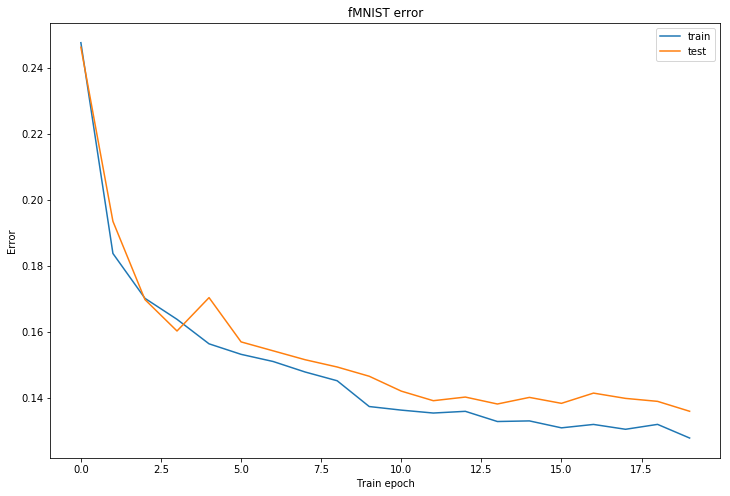

In [37]:
test_sched(3, 'tanh')

**Что можо сказать о времени выполнения? С учётом того, что различные эксперименты выполнялись в различных условиях загруженности копмьютера (когда я лёг спать и всё нужное позакрывал, то оно должно было начать работать быстрее с учётом общей тормознутости), не сильно стоит доверять времени обучения сетей, но из того, что есть, можно отметить, что увеличение числа слоёв сети влияет на время обучения, но, похоже, рост длительности обучения непропорционален увеличению размеров сети.**

## Классификация изображений на примере CIFAR-10

В этом задании вам предлагается попробовать различные архитектуры нейронных сетей в задаче классификации изображений. Для экспериментов будет использоваться база маленьких изображений [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), состоящая из цветных изображений размером 32x32 пикселя и разделенная на 10 непересекающихся классов.

<img src="https://thkimorgblog.files.wordpress.com/2016/03/e18489e185b3e1848fe185b3e18485e185b5e186abe18489e185a3e186ba-2016-03-12-e1848be185a9e1848ce185a5e186ab-1-02-16.png" width=500>
</img>

В обучающей выборке содержится 50000 примеров по 5000 примеров на каждый класс. Тестовая выборка состоит из 10000 изображений.


Загрузите [файл](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz) базы. В нем вы найдете обучающую выборку, разделенную на пять частей *data$\_$batch$\_$[1-5]*, и тестовую выборку *test_batch*. Каждую из частей можно загрузить с помощью следующей функции:

In [2]:
import codecs
import pickle

def unpickle(file_):
    fo = codecs.open(file_, 'rb')
    dict_ = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict_

Каждая часть представляет из себя <i>dict</i> объект:
- <b>labels</b>: список меток изображений (цифры от 0 до 9)
- <b>data</b>: numpy массив изображений размерностью (10000, 3072) (то есть каждая строка представляет из себя изображение). Первые 1024 элемента массива соответствуют красному каналу изображения, вторые 1024 элемента $-$ зеленому, последние 1024 элемента $-$ синему. Сами изображения записаны построчно, то есть в рамках 1024 значений, соответствующих каждому из каналов, первые 32 значения $-$ это первая строчка изображения, вторые 32 значения $-$ вторая и т.д.

Загрузите датасет, объединив все обучающие батчи в одну матрицу.

In [5]:
d = unpickle('cifar-10-batches-py/data_batch_1')
train_X = d['data']
train_y = d['labels']
for i in range(2, 6):
    bat = unpickle('cifar-10-batches-py/data_batch_' + str(i))
    train_X = np.concatenate((train_X, bat['data']), axis = 0)
    train_y = np.concatenate((train_y, bat['labels']), axis = 0)

test_bat = unpickle('cifar-10-batches-py/test_batch')
test_X = test_bat['data']
test_y = np.array(test_bat['labels'])

In [6]:
print(test_y.shape)
test_X.shape

(10000,)


(10000, 3072)

In [7]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X /= 255
test_X /= 255

print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

num_classes = 10

train_y = keras.utils.to_categorical(train_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

train_X shape: (50000, 3072)
50000 train samples
10000 test samples


In [8]:
print(test_y.shape)
print(test_X.shape)
print(train_X.shape)
print(train_y.shape)

(10000, 10)
(10000, 3072)
(50000, 3072)
(50000, 10)


**(1 балл) Задание 3.** С помощью библиотеки [keras](https://keras.io/) обучите небольшую полносвязную сеть на базе CIFAR-10. Сеть должна состоять из двух слоев по 512 нейронов, с функцией активации [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks). Для обучения сети используйте стохастический градиентный спуск с [моментумом Нестерова](https://keras.io/optimizers/#sgd). Попытайтесь подобрать начальный <i>learning rate</i>, темп его снижения <i>decay</i>, а также *коэффициенты l2 регуляризаторов* на весовые коэффициенты сети так, чтобы получить наилучшее качество классификации на тестовой выборке (значение функции потерь cross-entropy и топ-1 ошибку классификации). Диапазоны параметров, с которыми рекомендуется провести эксперименты:
- <i>learning rate</i>: от 0.005 до 0.1
- *decay*: от 1e-9 до 1e-5
- *l2 регуляризация*: от 1e-6 до 1e-4

Перед обучением необходимо нормализовать обучающую выборку так, чтобы все входные значения были в интервале [0;1].

**Данные привёл к необходимому формату, для подбора параметров составил сетку, в котрой рандомизированным поиском выбирал набор гиперпараметров, на которых обучался и строил зависимость качества от эпохи. Один эксперимент занимал час по времени примерно для двух скрытых слоёв, поэтому, больше, к сожалению, не успел, такжу упустил из виду названия графика, и всё отрисовало с title из предыдущего задания, но на самом деле это для CIFAR-10, и это точно. И эпох было только 25. Как можно будет увидеть далее, модели и к этой эпохе успели сильно переобучиться, о чём говорит разница в двух графиках разных цветов.** 

In [23]:
import functools


def test_cifar(lrate, decay, l2, n_hidden_layers, n_neurons):
    model = Sequential()
    model.add(Dense(n_neurons, input_dim=len(train_X[0]), kernel_initializer='uniform'))
    model.add(Activation('relu'))
    for i in range(1, n_hidden_layers):
        model.add(Dense(n_neurons, kernel_initializer='uniform'))
        model.add(Activation('relu'))
    model.add(Dense(10, kernel_initializer='uniform'))
    model.add(Activation('softmax'))

    sgd = SGD(lr=lrate, momentum=l2, decay=decay)
    top1_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=1)
    top1_acc.__name__ = 'top1_acc'
    model.compile(loss='categorical_crossentropy',
            optimizer=sgd,
            metrics=[top1_acc])
    
    history = model.fit(train_X, train_y,
            epochs=25,
            batch_size=128,
            verbose=0,
            validation_data=(test_X, test_y))

    score = model.evaluate(test_X, test_y, batch_size=128)
    print(score)
    print([lrate, decay, l2])
    train_error = 1 - np.array(history.history['top1_acc'])
    val_error = 1 - np.array(history.history['val_top1_acc'])

    plt.figure(figsize=(12, 8))
    plt.plot(train_error, label = 'train')
    plt.plot(val_error, label = 'test')
    plt.title('fMNIST error')
    plt.xlabel('Train epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

10000/10000 [==============================] - 9s 901us/step
[1.4244892299652099, 0.49340000000000001]
[0.01, 9.9999999999999995e-08, 9.9999999999999995e-07]


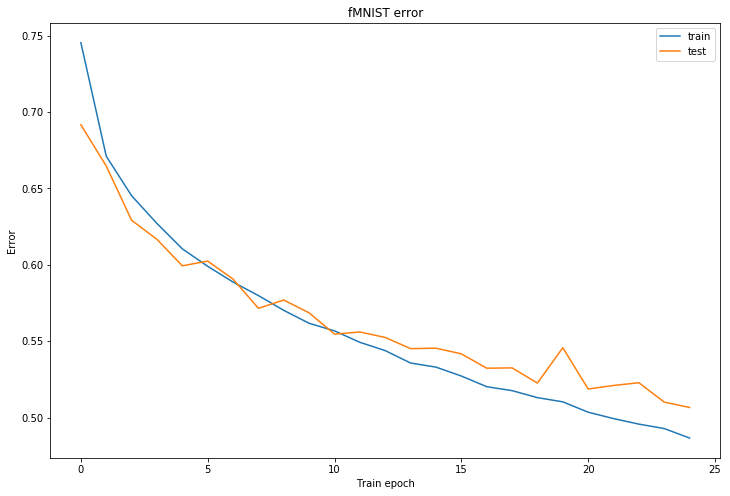

10000/10000 [==============================] - 9s 887us/step
[1.4263308521270752, 0.51519999999999999]
[0.10000000000000001, 1e-08, 0.0001]


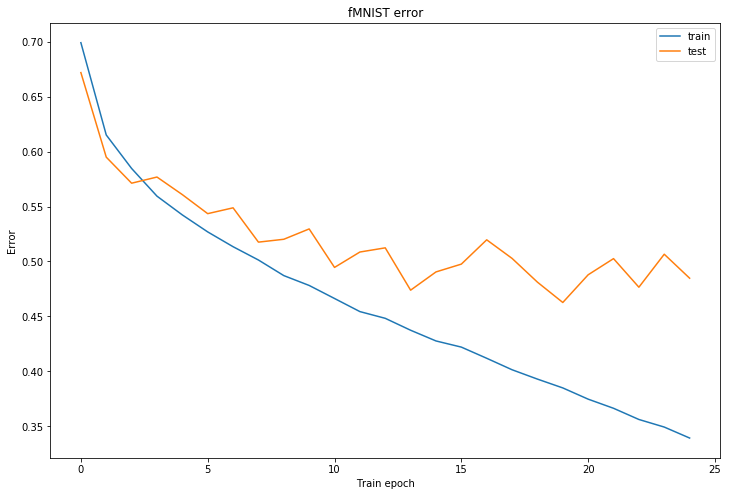

10000/10000 [==============================] - 10s 1ms/step
[1.4019262399673462, 0.49590000000000001]
[0.02, 9.9999999999999995e-08, 0.0001]


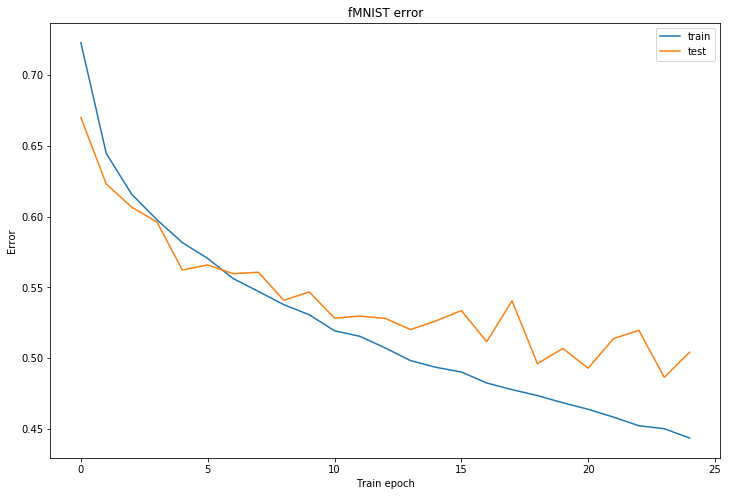

10000/10000 [==============================] - 9s 924us/step
[1.3937413074493408, 0.51859999999999995]
[0.074999999999999997, 1.0000000000000001e-09, 9.9999999999999995e-07]


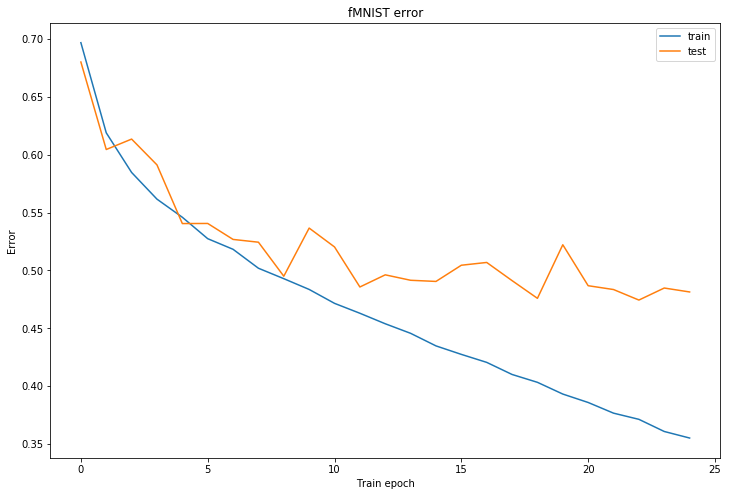

10000/10000 [==============================] - 8s 816us/step
[1.42469605178833, 0.48220000000000002]
[0.02, 1.0000000000000001e-09, 5.0000000000000004e-06]


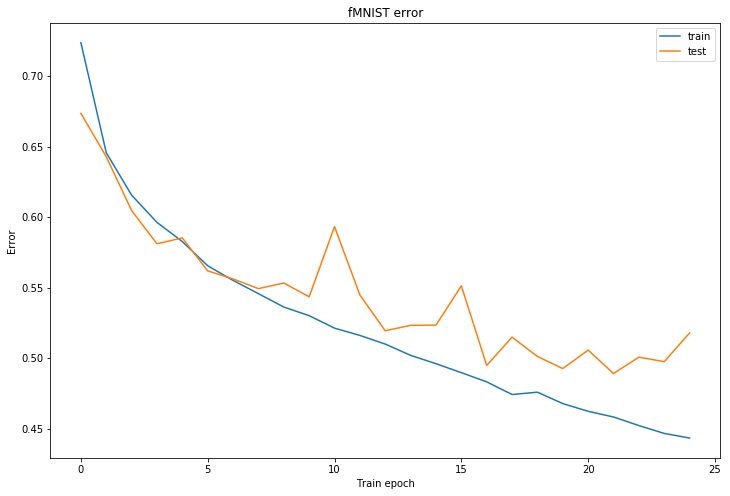

In [24]:
lrate_list = [0.005, 0.02, 0.1, 0.05, 0.01, 0.075]
decay_list = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
l2_list = [1e-6, 1e-5, 1e-4, 5e-6, 5e-5]

for i in range(5):
    lrate = np.random.choice(lrate_list)
    decay = np.random.choice(decay_list)
    l2 = np.random.choice(l2_list)
    test_cifar(lrate, decay, l2, 2, 512)

**(1 балл) Задание 4.** Поэкспериментируйте с размером сети: попробуйте увеличить количество нейронов в каждом слое и общую глубину сети.  Наблюдается ли сильное повышение качества классификации на тестовой выборке?

**Число слоёв увеличили, время выполения (и мою боль) тоже, число нейронов в полтора раза, в результуте получились переобученные модели, которые по качеству не сильно (а то и совсем не) лучше, чем сети с меньшим числом слоёв.**

10000/10000 [==============================] - 16s 2ms/step
[1.4855837236404419, 0.52769999999999995]
[0.10000000000000001, 1e-08, 5.0000000000000004e-06]


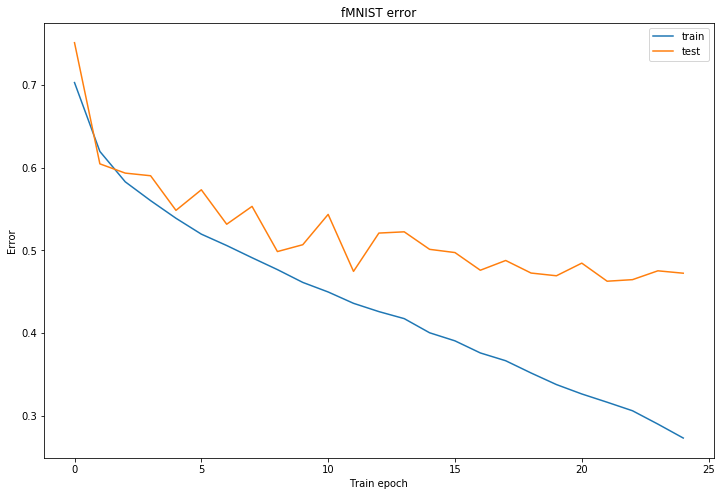

10000/10000 [==============================] - 19s 2ms/step
[1.3453005254745483, 0.5222]
[0.02, 1e-08, 5.0000000000000004e-06]


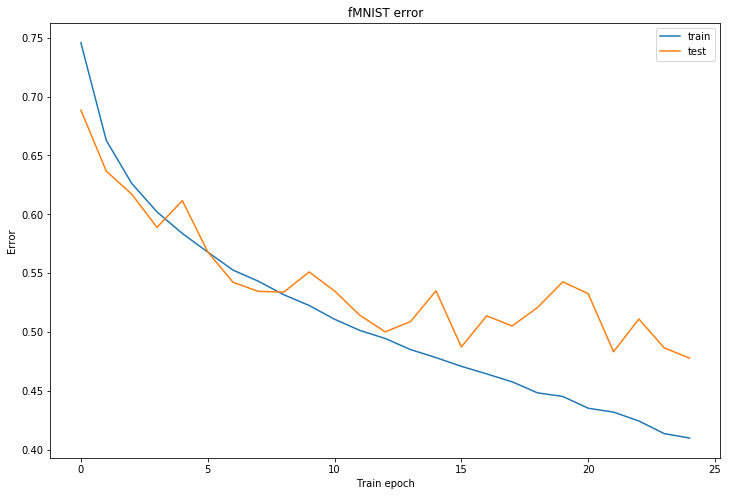

In [25]:
for i in range(2):
    lrate = np.random.choice(lrate_list)
    decay = np.random.choice(decay_list)
    l2 = np.random.choice(l2_list)
    test_cifar(lrate, decay, l2, 3+i, 768)

Теперь давайте попробуем обучить сверточную сеть небольшого размера. Для этого необходимо вначале изменить формат наших данных, так как сверточные сети работают не с векторами примеров, а с многомерными матрицами примеров. Для этого каждый элемент выборки нужно преобразовать из вектора длины 3072 в матрицу с размерностями (3, 32, 32), где каждый из элементов первой размерности отвечает за свой канал изображения.

**(2 балла) Задание 5.** Первая сверточная сеть будет состоять из трех сверточных блоков $-$ последовательностей свертки ([Convolution2D](https://keras.io/layers/convolutional/#conv2d)), нелинейности (ReLU) и пулинга ([MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d)). При построении сверточной нейронной сети обычно необходимо определить значения нескольких параметров:
- количества ядер свертки (различных карт признаков) в каждом из слоев
- размеры ядер
- тип и размер области слоя пулинга

**Карта признаков** (feature map) $-$ это результат применения одного ядра свертки ко входам в слой, которые в свою очередь представляют собой множество карт признаков предыдущего слоя.

Для текущего задания возьмите следующие значения:
- *размеры фильтров* во всех сверточных слоях будут равными 5x5 пикселей;
- *размер области max-пулинга* 3x3 пикселя со смещением в 2 пикселя (области пулинга будут перекрываться);
- *количество ядер* в первой сверточном слое возьмем равным 48, во втором — 64, а в третьем — 128.

**На практике** обычно используют пулинг размером 2x2 без перекрытия областей. Применение такого пулинга приводит к уменьшению в два раза размерности каждой из входных карт признаков. В следующем после пулинга сверточном слое увеличивают количество ядер в два раза. Однако в данной работе необходимо сделать достаточно небольшую и неглубокую сеть, которую можно обучить за разумное время на обычном ноутбуке, поэтому в данном задании мы отступаем от стандартных практик.

После сверточных блоков необходимо добавить в сеть два полносвязных слоя размерности 512 с нелинейностями.
Перед каждым сверточным слоем в сети необходимо добавить слои дополнения нулями входных карт признаков, для того чтобы после операции свертки размеры карт не изменялись, используя слой [ZeroPadding2D](https://keras.io/layers/convolutional/#zeropadding2d). Подберите значения паддинга таким образом, чтобы после свертки 5x5 получались карты признаков такой же размерности, как и до свертки.

Итоговую архитектуру сети можно вывести после применения метода <i>compile</i> с помощью:
    
    print model.summary()
    
Попробуйте подобрать начальный learning rate так, чтобы избежать расхождения обучения в самом начале.

**Обратите внимание:**
- обучение подобной сети на ноутбуке в течение 15 эпох может занять около 3-х часов. Для того, чтобы убедиться в корректности составленной архитектуры можно попробовать запустить обучение на подмножестве обучающей выборки и убедиться в уменьшении ошибки классификации;
- для сверточных сетей критерий останова вводить не стоит, так как обучение их до сходимости весьма затратно по времени.

Большие нейронные сети склонны к переобучению. Для того, чтобы бороться с переобучением, в области распознавания изображений активно применяют техники расширения обучающей выборки. Для этого к обучающим изображениям применяют различные преобразования, которые не меняют класс объекта. В рамках данного задания мы возьмем сверточную сеть, которую обучали ранее, и будем применять ко входным изображениям случайные сдвиги по обеим координатам и горизонтальные перевороты изображения. Для этого можно воспользоваться специальным классом [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator). 

Задайте параметры <i>ImageDataGenerator</i> таким образом, чтобы он осуществлял случайные горизонтальные и вертикальные сдвиги изображения в пределах трех пикселей и случайные горизонтальные перевороты. Также не забудьте правильно выставить порядок размерностей во входных данных в параметре <i>dim_ordering</i> при создании экземпляра класса ImageDataGenerator.

**(1 балл) Задание 6.** Обучите сверточную сеть той же архитектуры, которая использовалась раннее. Как расширение выборки отразилось на качестве классификации на тестовой выборке?

## Предсказание тональности отзывов на фильмы

В данном задании вам предлагается попробовать различные архитектуры нейронных сетей и форматы представления входных данных в задаче текстовой классификации на примере [базы отзывов IMDB](http://ai.stanford.edu/~amaas/data/sentiment/).

<img src="http://medialeaks.ru/wp-content/uploads/2015/10/IMDb.jpg" width=500>
</img>

Данная база содержит 25000 отзывов в обучающем множестве и 25000 отзывов в тестовом. Все отзывы разбиты на два класса: положительные и отрицательные. Данные разбиты между обучающим и тестовым множествам по фильмам, то есть в тестовом множестве нет отзывов на те фильмы, которые есть в обучении.

В файле с базой есть две разные папки для обучающей и тестовой выборке. В каждой из папок верхнего уровне есть папки отрицательных и положительных отзывов. Каждый отзыв лежит в отдельном текстовом файле.

Загрузите отзывы из обучающей и тестовой выборок. Напишите схему токенизации текста:
- текст нужно перевести в нижний регистр
- выделить слова в тексте. 

Словами/токенами мы считаем последовательности букв и цифр, разделенные знаками препинания и пробелами. Здесь и далее для токенизации текста вы можете использовать функцию [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

Выделите множество токенов в обучающих текстах и составьте словарь из 10000 самых частотных слов.

В качестве представления для входных текстов мы будем использовать мешок слов. Каждый отзыв будет представлен вектором с длиной равной количеству токенов в словаре. На позиции в векторе, которая соответствует определенному токену в словаре, будет записано количество вхождений этого токена в обучающий сэмпл. Так как keras не поддерживает разреженные входы, то необходимо будет использовать обычные вектора. Обратите внимание, что в случае использования функции *CountVectorizer*, необходимо дополнительное преобразование из разряженного представления. Напишите функцию, которая по входному тексту и словарю возвращает его представление в виде мешка слов.

**(1 балл) Задание 7.** С помощью функций [train_on_batch](https://keras.io/models/sequential/#train_on_batch) и [test_on_batch](https://keras.io/models/sequential/#test_on_batch) класса модели в keras напишите процедуру обучения/тестирования нейронной сети в побатчевом режиме на выборке сэмплов. 

Функция должна принимать на вход выборку текстов и соответствующих им классификационных меток, а также размер батча, используемого при обучении/тестировании. Подача  батчей в сеть должна происходить в случайном порядке. Кодирование текстов в сэмплах должно осуществляться непосредственно в момент формирования батча. Это позволяет значительно снизить необходимый объем памяти для обработки выборки, так как не обязывает нас хранить все сэмплы в закодированном виде.

Также данная процедура должна осуществлять подсчет функци потерь и классификационной ошибки на обучающей выборке путем усреднения ошибок на отдельных батчах. 

**(1 балл) Задание 8.** С помощью разработанного метода обучите полносвязную сеть для решения задачи предсказания тональности. Попробуйте использовать различные архитектуры (с разным количеством слоев, например, 2-4, и нейронов, например, от 100 до 500), а также разные методы регуляризации (l2 регуляризация на веса и Dropout, в том числе после самого первого слоя). Попробуйте провести эксперименты не только с обычным градиентным спуском, но и с более сложными алгоритмами с адаптивными learning rate, например, [RMSPROP](https://keras.io/optimizers/#rmsprop). 

Для быстрой оценки качества подобранной комбинации иногда достаточно посмотреть на динамику ошибки в течение первых нескольких эпох обучения. При этом однако, необходимо помнить, что более агрессивная регуляризация обычно снижает скорость сходимости, но приводит к более низкой ошибке на тестовой выборке.

Сделайте небольшую таблицу с результатами вашего исследования. Какого наилучшего качества классификации вам удалось добиться на тестовой выборке и с какой комбинацией параметров?

Так как выборка IMDB является не очень большой по размеру, то используя только ее достаточно сложно выучить хорошие распределенные представления для слов, которые формируются в первом полносвязном слое сети.

Мы можем инициализировать этот первый слой сети из каких-либо предобученных векторных представлений слов. В рамках данного задания мы будем использовать 100000 наиболее частотных слов из модели word2vec, обученной на большом корпусе новостей. Скачать вектора можно по [ссылке](https://www.dropbox.com/s/wefgvcqqym0brh7/mikolov_w2v_100k.tsv?dl=0). В этом файле в первой строчке записано количество слов в словаре и размерность представления, а дальше на на каждой строчке записано слово, а за ним идет 300-мерное представление этого слова. 

Пересеките выделенный вами словарь со словарем word2vec и составьте матрицу весов для инициализации первого полносвязного слоя сети. Более 80% слов из вашего словаря будут присутствовать и в word2vec, а вектора тех слов, которые не нашлись, проинициализируйте из распределения $U\left(-0.05, 0.05\right)$

**(0.5 балла) Задание 9.** Обучите нейронную сеть с подобранными вами ранее наилучшими параметрами, при этом инициализировав первый Dense слой получившейся матрицей. Так как предоставленный word2vec имеет размерность 300, то и этот первый слой также будет иметь 300 нейронов. Удалось ли вам получить более высокое качество классификации?

Небольшое количество слов с словаре не позволяет учитывать все возможные словоформы различных слов, а также частые опечатки, которые встречаются в реальных текстах. Особенно это становится заметно на языках с богатой морфологией. Из-за этого редкие слова не попадают в мешок слов, что потенциально может снижать качество работы классификатора.

Для борьбы с этим явлением на практике в дополнение к словам часто используются буквенные триграммы в качестве токенов. Например, текст "Машинное обучение - рулит!" после приведения к нижнему регистру будет разбит на множество триграмм ["маш", "аши", "шин", "инн", "ное", "ое ", "е о", " об", "обу", "буч", "уче", "чен", "ени", "ние", "ие ", "е -", " - ", "- р", " ру", "рул", "ули", "лит", "ит!"]. Также буквенные триграммы позволяют обучать совместное представления для однокоренных слов. Обычно при составлении буквенных триграмм мы не игнорируем знаки пунктуации и пробелы в тексте.

Выделите из обучающих текстов 2000 наиболее частотных буквенных триграмм (после приведения текстов в нижний регистр). Составьте смешанный словарь токенов, в котором будет 8000 наиболее частотных слов и 2000 триграмм. 

**(0.5 балла) Задание 10.** Модифицируйте методы кодирования текста и метод обучения нейронной сети так, чтобы они работали для смешанного словаря. Попробуйте обучить несколько архитектур полносвязных нейронных сетей, используя новое представления текста.

**(1 балл) Задание 11.**Постройте сводный график, сравнивающий различные представления текста и различные архитектуры сетей. Какие выводы можно сделать из проведенного вами исследования?